In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



In [13]:
cols=["fLength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
df["class"]=(df["class"]=="g").astype(int)

In [16]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


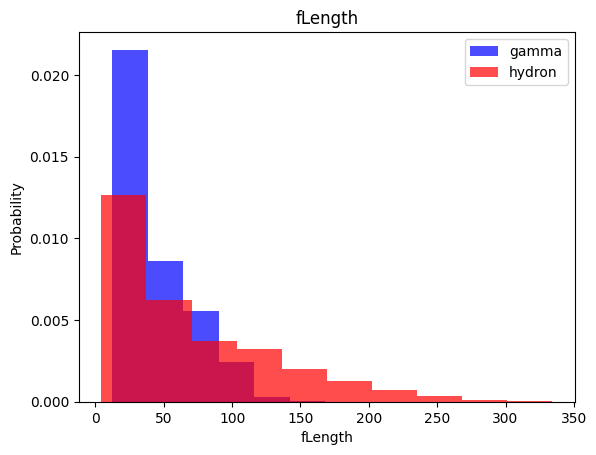

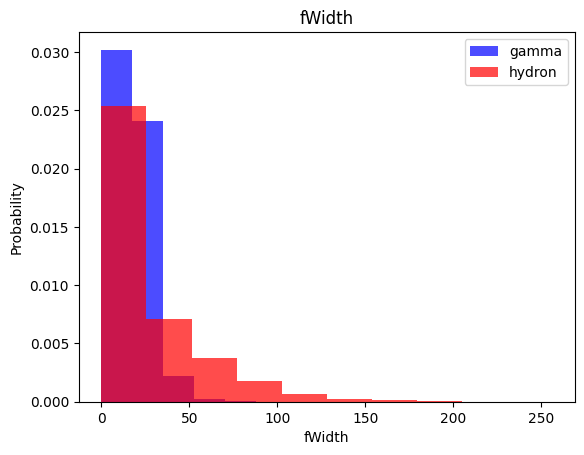

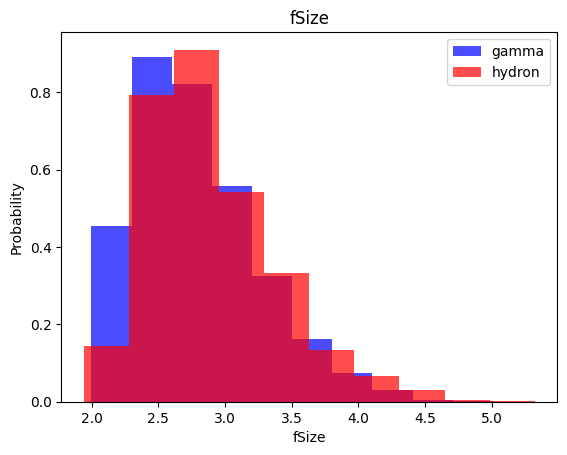

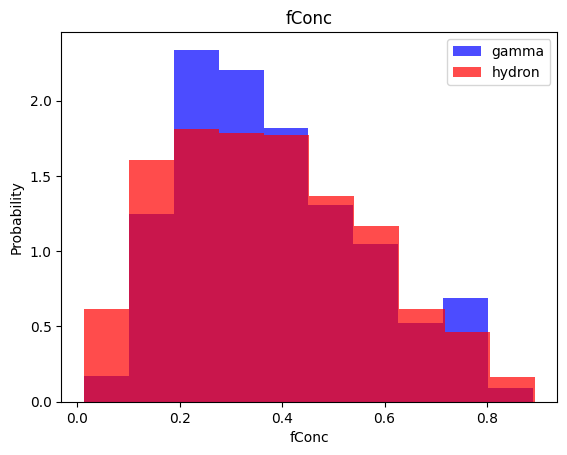

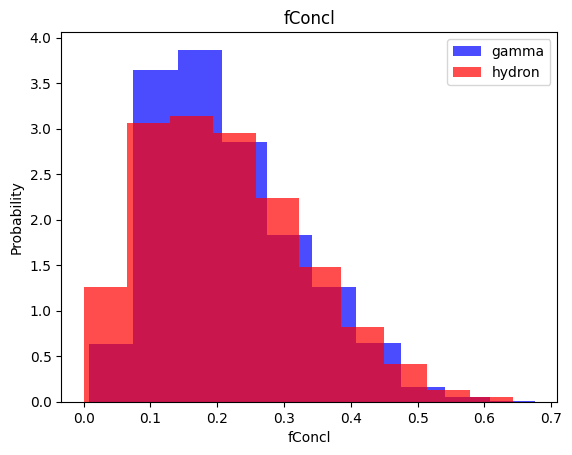

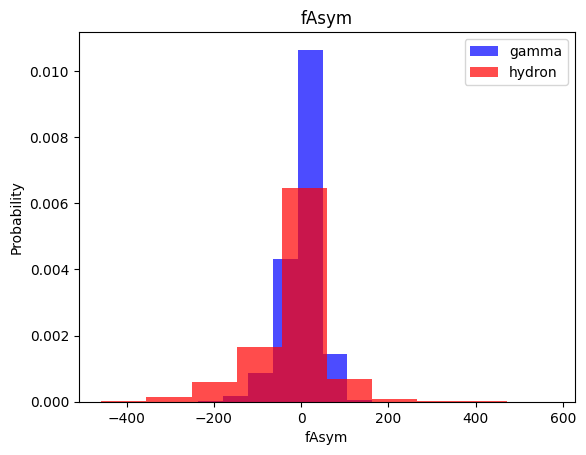

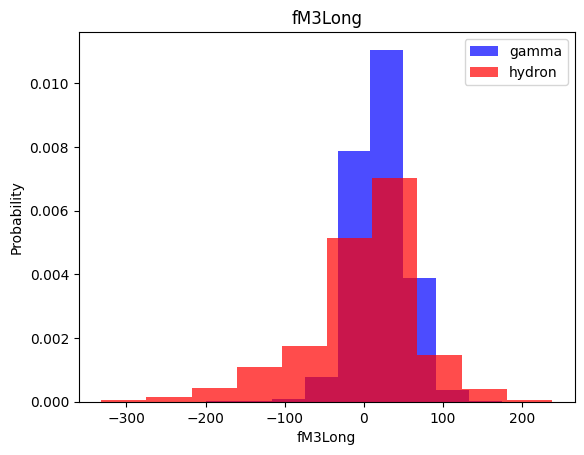

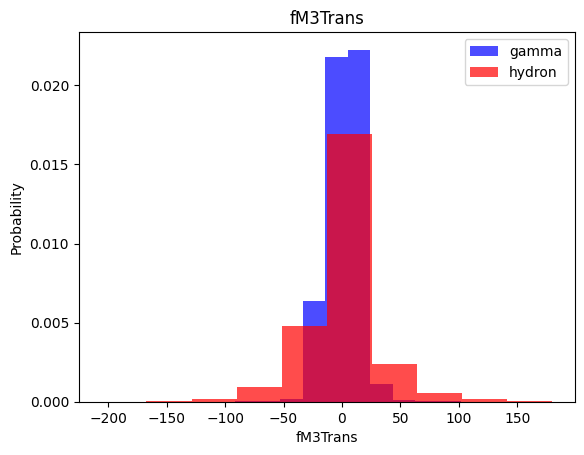

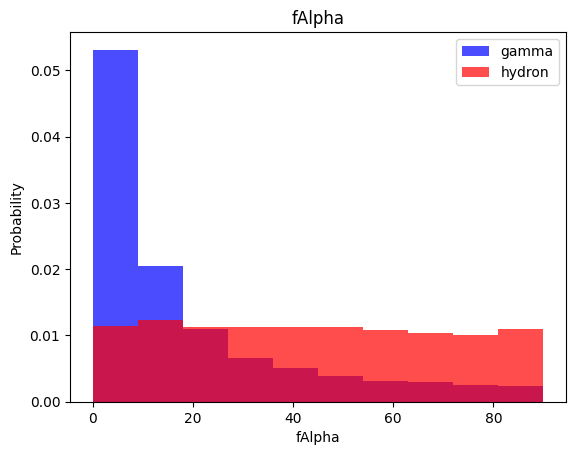

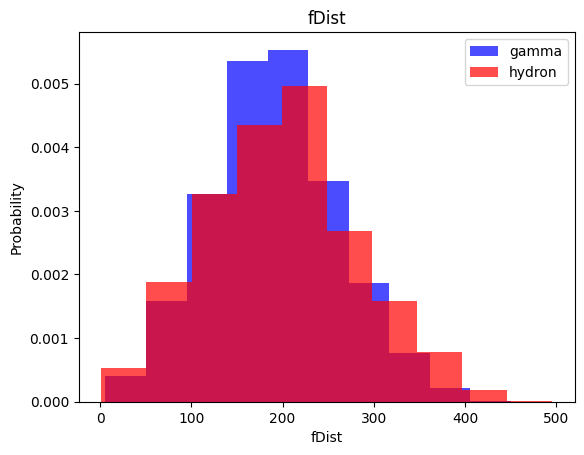

In [21]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma',alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hydron',alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [23]:
#Train, validation,test datasets

In [65]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [56]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x ,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))
  return data,x,y


In [66]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


In [42]:
len(y_train)

14722

In [43]:
sum(y_train ==1)

7361

In [46]:
sum(y_train == 0)

7361

kNN K nearest neighbor

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
y_pred = knn_model.predict(x_test)

In [77]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1309
           1       0.84      0.88      0.86      2495

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [87]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      1309
           1       0.74      0.89      0.81      2495

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [96]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1309
           1       0.86      0.82      0.84      2495

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



#SVM

In [98]:
from sklearn.svm import SVC

In [100]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [101]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1309
           1       0.90      0.91      0.91      2495

    accuracy                           0.88      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.88      0.87      3804



#Neural Net

In [1]:
import tensorflow as tf

In [4]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
def plot_loss(history);
plt.plot(history.history['loss'], label='loss')
plt.plot(history.hiostory['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Binary crossentropy')
plt.legend()
plt.grid(True)
plt.show()

def plot_accuracy(history)